### Support vector regression

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [4]:
df = pd.read_csv('../dataset/Position_Salaries.csv')
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [5]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


we don't have coefficients here like linear regression that can compensate so we have to apply feature scaling here.

#### Feature Scaling

In [8]:

y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [9]:
# the standard scalar takes 2D array so we have to convert the y to a 2D value
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [10]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [11]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


#### Training

In [12]:
# rbf = In machine learning, the radial basis function kernel, or RBF kernel, is a popular kernel function used in various kernelized learning algorithms.
from sklearn.svm import SVR
reg = SVR(kernel='rbf')
reg.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

#### Predicting the result 
reversing the feature scaling 

In [15]:
sc_y.inverse_transform(reg.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

#### visualising the SVR results

Text(0, 0.5, 'Salaries')

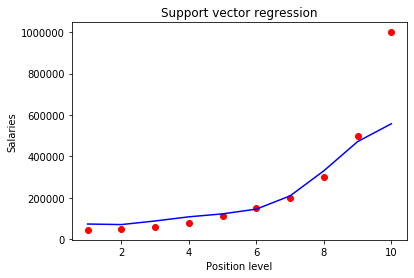

In [16]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(reg.predict(X)), color='blue')
plt.title('Support vector regression')
plt.xlabel('Position level')
plt.ylabel('Salaries')

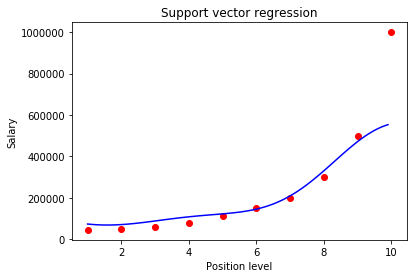

In [20]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(X_grid,sc_y.inverse_transform(reg.predict(sc_X.transform(X_grid))),color='blue')
plt.title('Support vector regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()